模块使用

# 1 scipy.io
## 读取矩阵数据

In [1]:
import numpy as np
from scipy import io as spio
a = np.ones((3,3))
spio.savemat('file.mat',{'a':a})
data = spio.loadmat('file.mat',struct_as_record=True)
data['a']

array([[ 1.,  1.,  1.],
       [ 1.,  1.,  1.],
       [ 1.,  1.,  1.]])

## 读取图像

In [2]:
from scipy import misc
misc.imread('fname.png')

array([[[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ..., 
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ..., 
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ..., 
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       ..., 
       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ..., 
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ..., 
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       

In [7]:
import matplotlib.pyplot as plt
plt.imread('fname.png')

array([[[ 1.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.],
        ..., 
        [ 1.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.]],

       [[ 1.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.],
        ..., 
        [ 1.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.]],

       [[ 1.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.],
        ..., 
        [ 1.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.]],

       ..., 
       [[ 1.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.],
        ..., 
        [ 1.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.]],

       [[ 1.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.],
        ..., 
        [ 1.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.]],

       

+ **文本文件**  
numpy.loadtxt() / numpy.savetxt()  
+ **txt/csv文件**  
numpy.genfromtxt()/numpy.recfromcsv()  
+ **二进制文件**  
numpy.load() / numpy.save()

# 2 scipy.linalg

## 计算行列式

In [8]:
from scipy import linalg
arr= np.array([[1,2],
              [3,4]])
linalg.det(arr)

-2.0

In [9]:
arr = np.array([[3,2],
               [6,4]])
linalg.det(arr)

6.661338147750939e-16

In [10]:
linalg.det(np.ones(3,4))

TypeError: data type not understood

## 计算逆矩阵

In [12]:
arr = np.array([[1,2],[3,4]])
iarr = linalg.inv(arr)
iarr

array([[-2. ,  1. ],
       [ 1.5, -0.5]])

In [14]:
# 验证
np.allclose(np.dot(arr,iarr),np.eye(2))

True

In [15]:
# 奇异矩阵求逆抛出异常
arr = np.array([[3,2],[6,4]])
linalg.inv(arr)

LinAlgError: singular matrix

## 奇异值分解

In [17]:
arr = np.arange(9).reshape((3,3)) + np.diag([1,0,1])
uarr,spec,vharr = linalg.svd(arr)
spec

array([ 14.88982544,   0.45294236,   0.29654967])

In [18]:
sarr =  np.diag(spec)
svd_mat = uarr.dot(sarr).dot(vharr)
np.allclose(svd_mat,arr)

True

SVD常用于统计和信号处理领域。其他的一些标准分解方法(QR, LU, Cholesky, Schur) 在 scipy.linalg 中也能够找到。

# 3 优化

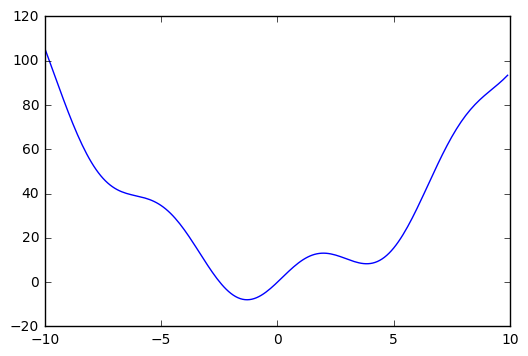

In [19]:
from scipy import optimize
def f(x):
    return x**2 + 10*np.sin(x)
x = np.arange(-10,10,0.1)
plt.plot(x,f(x))
plt.show()

此函数有一个全局最小值，约为-1.3，含有一个局部最小值，约为3.8.  
在寻找最小值的过程中，确定初始值，用梯度下降的方法，bfgs是一个很好的方法。

In [20]:
optimize.fmin_bfgs(f,0)

Optimization terminated successfully.
         Current function value: -7.945823
         Iterations: 5
         Function evaluations: 18
         Gradient evaluations: 6


array([-1.30644012])

In [21]:
# 但是方法的缺陷是陷入局部最优解
optimize.fmin_bfgs(f,5)

Optimization terminated successfully.
         Current function value: 8.315586
         Iterations: 5
         Function evaluations: 18
         Gradient evaluations: 6


array([ 3.83746711])

可以在一个区间中找到一个最小值

In [23]:
xmin_local = optimize.fminbound(f,0,10)
xmin_local

3.8374671194983834

寻找函数的零点

In [24]:
# guess 1 
root = optimize.fsolve(f,1)
root

array([ 0.])

In [25]:
# guess -2.5
root = optimize.fsolve(f,-2.5)
root

array([-2.47948183])

## 曲线拟合
从函数f中采样得到一些含有噪声的数据

In [26]:
xdata = np.linspace(-10,10,num=20)
ydata = f(xdata)+np.random.randn(xdata.size)

我们已经知道函数的形式$x^2+\sin(x)$,但是每一项的系数不清楚，因此进行拟合处理

In [33]:
def f2(x,a,b):
    return a*x**2 + b*np.sin(x)
guess=[3,2]
params,params_covariance = optimize.curve_fit(f2, xdata, ydata, guess)
params

array([  1.00123877,  10.36873314])

## 绘制结果

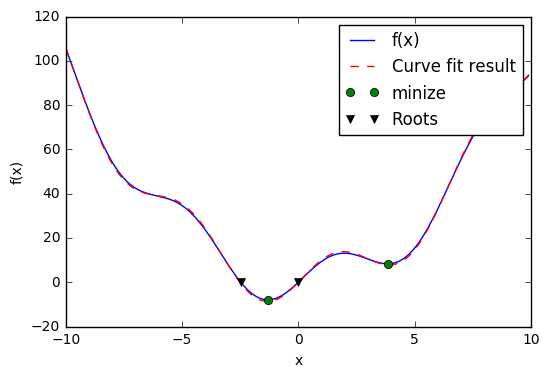

In [41]:
x = np.arange(-10,10,0.1)
def f(x):
    return x**2 + 10 * np.sin(x)
grid = (-10,10,0.1)
xmin_global = optimize.brute(f,(grid,))
xmin_local = optimize.fminbound(f,0,10)
root = optimize.fsolve(f,1)
root2 = optimize.fsolve(f,-2.5)
xdata = np.linspace(-10,10,num=20)
np.random.seed(1234)
ydata = f(xdata)+np.random.randn(xdata.size)
def f2(x,a,b):
    return a*x**2 + b * np.sin(x)
guess=[2,2]
params,_ =optimize.curve_fit(f2,xdata,ydata,guess)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x,f(x),'b-',label='f(x)')
ax.plot(x,f2(x,*params),'r--',label='Curve fit result')
xmins = np.array([xmin_global[0],xmin_local])
ax.plot(xmins,f(xmins),'go',label='minize')
roots = np.array([root,root2])
ax.plot(roots,f(roots),'kv',label='Roots')
ax.legend()
ax.set_xlabel('x')
ax.set_ylabel('f(x)')
plt.show()

# 4 统计

## 直方图和概率密度统计

In [42]:
a = np.random.normal(size=1000)
bins = np.arange(-4,5)
bins

array([-4, -3, -2, -1,  0,  1,  2,  3,  4])

In [44]:
histogram = np.histogram(a,bins=bins,normed=True)[0]
bins = 0.5*(bins[1:]+bins[:-1])
bins

array([-3.5, -2.5, -1.5, -0.5,  0.5,  1.5,  2.5,  3.5])

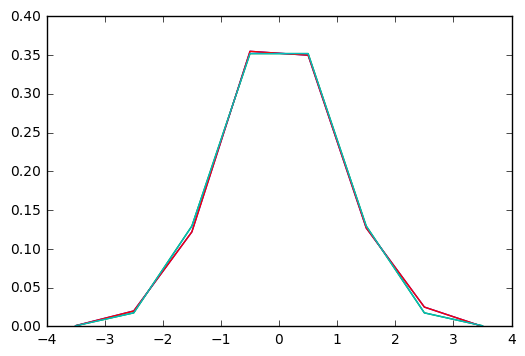

In [46]:
from scipy import stats
b =stats.norm.pdf(bins)
plt.plot(bins,histogram)
plt.plot(bins,b)
plt.show()

## 百分位数
百分位是累计概率分布函数的一个估计

In [47]:
np.median(a)

0.0070206524754117226

In [48]:
stats.scoreatpercentile(a,50)

0.0070206524754117226

In [49]:
stats.scoreatpercentile(a,90)

1.3003779670735938

## 统计检验

统计检验的结果常用作一个决策指标。例如，如果我们有两组观察点，它们都来自高斯过程，我们可以使用 T-检验 来判断两组观察点是都显著不同:

In [50]:
a = np.random.normal(0,1,size=100)
b = np.random.normal(0,1,size=10)
stats.ttest_ind(a,b)

Ttest_indResult(statistic=-1.1408989974867128, pvalue=0.25643553551908738)

返回结果分成连个部分
+ T检验统计量  
使用检验的统计量的值  
+ P值  
如果结果接近1，表明符合预期，接近0表明不符合预期。

# 5 插值

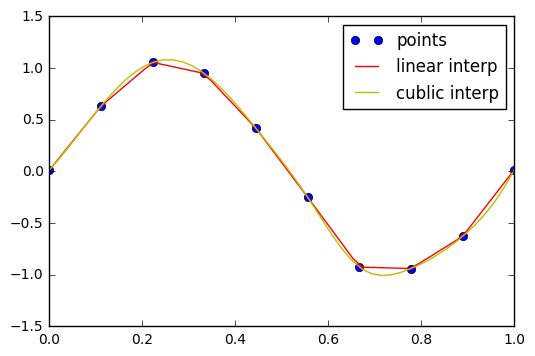

In [62]:
measured_time = np.linspace(0,1,10)
noise = (np.random.random(10)*2-1) *1e-1
measure = np.sin(2*np.pi*measured_time) + noise
from scipy.interpolate import interp1d
linear_interp = interp1d(measured_time, measure)
computed_time = np.linspace(0, 1, 50)
linear_results = linear_interp(computed_time)
cublic_interp = interp1d(measured_time, measure, kind='cubic')
cublic_results = cublic_interp(computed_time)
plt.plot(measured_time,measure,'o',label='points')
plt.plot(computed_time,linear_results,'r-',label='linear interp')
plt.plot(computed_time,cublic_results,'y-',label='cublic interp')
plt.legend()
3 plt.show()

# 练习

## 温度曲线拟合  
阿拉斯加每个月温度的最大值和最小值数据见下表：  

最小值 | 最大值 | 最小值 | 最大值
--- | --- | --- | --- 
-62 | 17 | -9 | 37
-59 | 19 | -13 | 37
-56 | 21 | -25 | 31
-46 | 28 | -46 | 23
-32 | 33 | -52 | 19
-18 | 38 | -48 | 18

**要求**
+ 绘制温度图像  
+ 拟合出一条函数曲线
+ 使用scipy.optimize.curvie_fit()来拟合函数
+ 画出函数图像。
+ 判断最大值和最小值的偏置是否合理

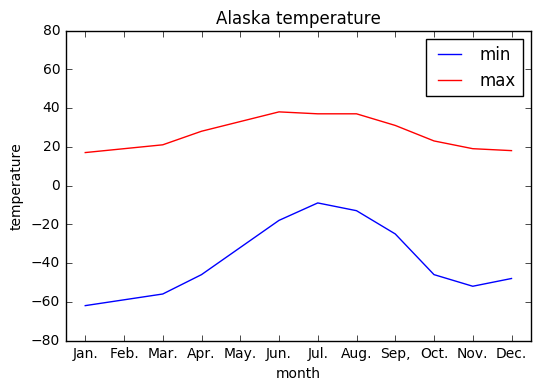

In [25]:
import numpy as np
import matplotlib.pyplot as plt
months = np.arange(1,13)
mins = [-62,-59,-56,-46,-32,-18,-9,-13,-25,-46,-52,-48]
maxes = [17,19,21,28,33,38,37,37,31,23,19,18]
fig,ax = plt.subplots()
plt.plot(months,mins,'b-',label='min')
plt.plot(months,maxes,'r-',label='max')
plt.ylim(-80,80)
plt.xlim(0.5,12.5)
plt.xlabel('month')
plt.ylabel('temperature')
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12],
           ['Jan.','Feb.','Mar.','Apr.','May.','Jun.','Jul.','Aug.','Sep,','Oct.','Nov.','Dec.'])
plt.legend()
plt.title('Alaska temperature')
plt.show()

从图像上来看，温度的最高值和最低值都符合二次函数的特点，$y = at^2+bt+c$,其中$c$为时间$t$的偏置。

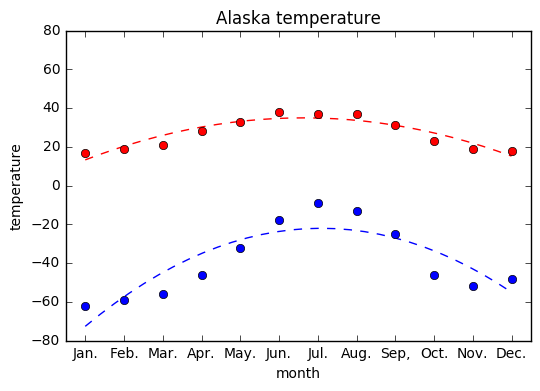

In [41]:
from scipy import optimize
def f(t,a,b,c):
    return a * t**2+b*t+c
guess = [-1,8,50]
params_min,_ = optimize.curve_fit(f,months,mins,guess)
params_max,_ = optimize.curve_fit(f,months,maxes,guess)
times = np.linspace(1,12,30)
plt.plot(times,f(times,*params_min),'b--',label='min_fit')
plt.plot(times,f(times,*params_max),'r--',label='max_fit')
plt.plot(months,mins,'bo',label='min')
plt.plot(months,maxes,'ro',label='max')
plt.ylim(-80,80)
plt.xlim(0.5,12.5)
plt.xlabel('month')
plt.ylabel('temperature')
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12],
           ['Jan.','Feb.','Mar.','Apr.','May.','Jun.','Jul.','Aug.','Sep,','Oct.','Nov.','Dec.'])
plt.title('Alaska temperature')
plt.show()

温度最高值拟合效果较好，但温度最低值拟合效果不太好

## 求解最小值

驼峰函数 $$f(x,y)=(4-2.1x^2+\frac{x^4}{3})x^2+xy+(4y^2-4)y^2$$  
+ 限制变量范围: $-2<x<2,-1<y<1$  
+ 使用 numpy.meshgrid() 和 pylab.imshow() 目测最小值所在区域  
+ 使用 scipy.optimize.fmin_bfgs() 或者其他的用于可以求解多维函数最小值的算法

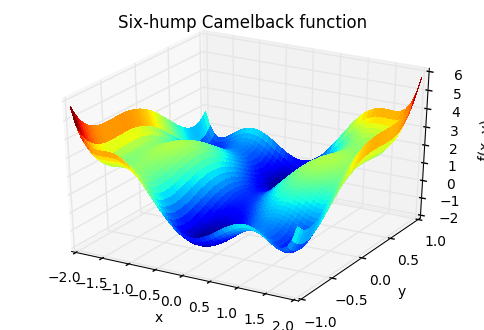

In [44]:
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


def sixhump(x):
    return (4 - 2.1*x[0]**2 + x[0]**4 / 3.) * x[0]**2 + x[0] * x[1] + (-4 + 4*x[1]**2) * x[1] **2

x = np.linspace(-2, 2)
y = np.linspace(-1, 1)
xg, yg = np.meshgrid(x, y)

#plt.figure()  # simple visualization for use in tutorial
#plt.imshow(sixhump([xg, yg]))
#plt.colorbar()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(xg, yg, sixhump([xg, yg]), rstride=1, cstride=1,
                       cmap=plt.cm.jet, linewidth=0, antialiased=False)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')
ax.set_title('Six-hump Camelback function')
plt.show()

In [53]:
min1 = optimize.fmin_bfgs(sixhump,[0,-0.5])
min2 = optimize.fmin_bfgs(sixhump,[0,0.5])
min3 = optimize.fmin_bfgs(sixhump,[-1.4,1.0])

Optimization terminated successfully.
         Current function value: -1.031628
         Iterations: 6
         Function evaluations: 36
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: -1.031628
         Iterations: 6
         Function evaluations: 36
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: -0.215464
         Iterations: 8
         Function evaluations: 48
         Gradient evaluations: 12


In [55]:
local1 = sixhump(min1)
local2 = sixhump(min2)
local3 = sixhump(min3)
print local1,local2,local3

-1.03162845349 -1.03162845349 -0.215463824384
